In [1]:
from preprocess import get_prepared_data

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/Users/igorjakus/projects/neurohackathon/venv/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
X, y = get_prepared_data(shuffle=True, oversample=True)

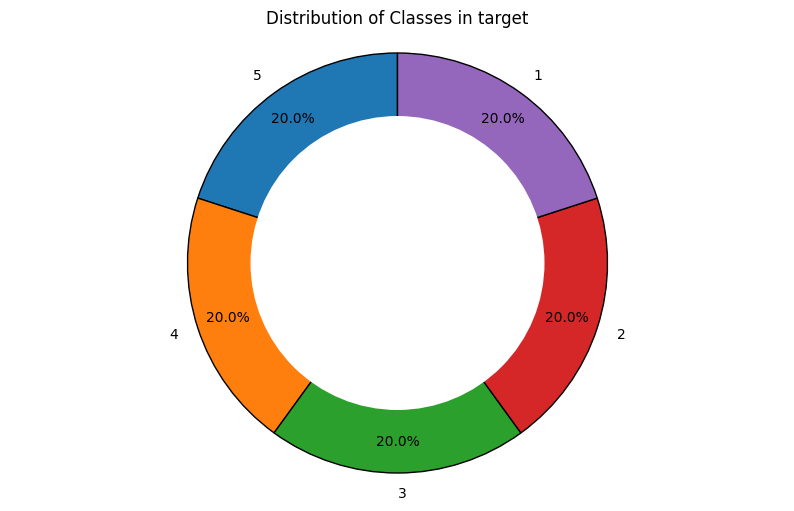

In [3]:
#default distribution of classes
X, y = get_prepared_data(relabel=False)

# Convert to DataFrame for easier plotting
df = pd.DataFrame(X)
df['target'] = y

# Count the occurrences of each class
value_counts = df['target'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(10, 6))

plt.pie(
    value_counts, 
    labels=value_counts.index, 
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Start the pie chart at 90 degrees
    wedgeprops={'edgecolor': 'black'},  # Add edge color for clarity
    pctdistance=0.85    # Percentage label distance from center for donut chart
)

# If you want a donut chart, add a circle at the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Distribution of Classes in target')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Show the plot
plt.show()

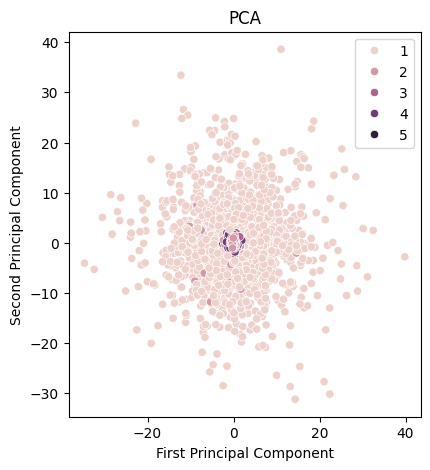

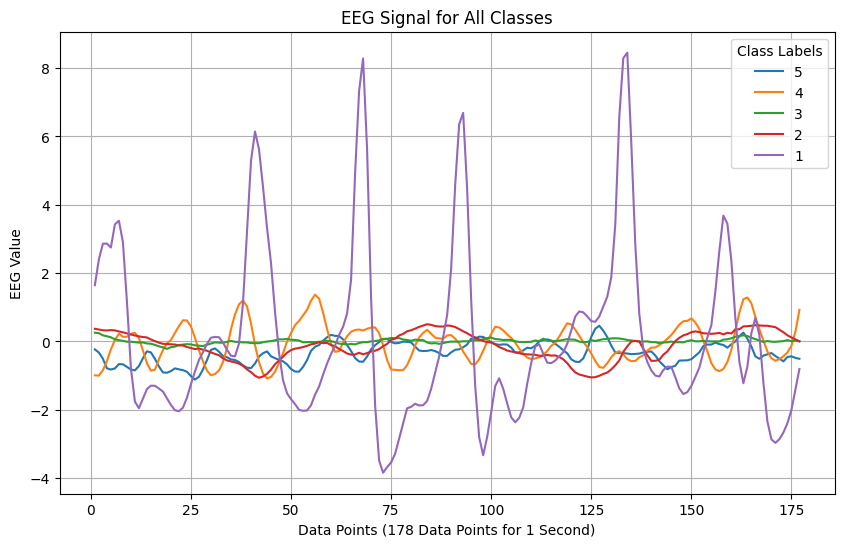

In [4]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.figure(figsize=(10, 6))

unique_classes = df['target'].unique()

# Loop through each class and plot the sample data
for label in unique_classes:
    class_data = df[df['target'] == label]  # Get data for the current class
    sample_index = 0  
    sample_data = class_data.iloc[sample_index]

    # Plot the trace for this class
    plt.plot(sample_data.index[1:-1],  # Exclude the label and last column
             sample_data.values[1:-1],  # Exclude the label and last column
             label=label)

# Set the plot title and labels
plt.title('EEG Signal for All Classes')
plt.xlabel('Data Points (178 Data Points for 1 Second)')
plt.ylabel('EEG Value')
plt.legend(title='Class Labels')
plt.grid(True)

# Show the plot
plt.show()

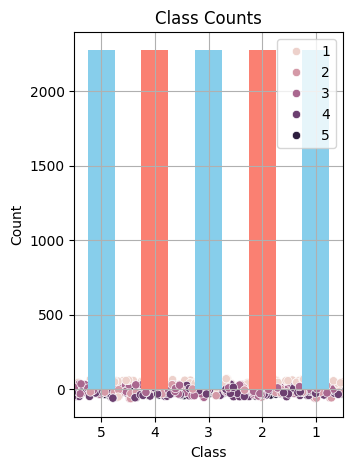

In [5]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.subplot(122)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y)
plt.title('t-SNE')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.tight_layout()
# 1. Distribution of classes
value_counts = df['target'].value_counts()
value_counts.plot(kind='bar', color=['skyblue', 'salmon'], title='Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.grid(True)
plt.show()

/Users/igorjakus/projects/neurohackathon/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0, 0.5, 'Second UMAP Component')

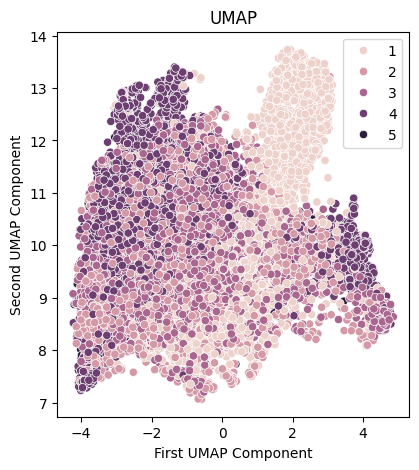

In [6]:
# UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)

plt.figure(figsize=(10, 5))

plt.subplot(121)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y)
plt.title('UMAP')
plt.xlabel('First UMAP Component')
plt.ylabel('Second UMAP Component')